# Phase 2 - Milestones 2

## I. Perkenalan

### I.I Identitas

Nama : Ahmad Nawwaaf

Batch : 002

### I.II Dataset Overview

Link dataset : <a href="https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset">Car vs Bike Classification Dataset</a>

Download dataset : <a href="https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset/download?datasetVersionNumber=1">Download Dataset</a>

This data set is a collection of 2,000 Bike and Car images. This data set is from kaggle (<a href="https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset">Car vs Bike Classification Dataset</a>), It was made sure that all types of bikes and cars are included in the image collection. This is because of the high Intra-variety of cars and bikes. That is, there are different types of cars and bikes, this make it a little tough task for the model, because the model will also have to understand the high variety of bikes and cars. But if your model is able to understand the basic structure of a car and a bike, it will be able to distinguish between both classes.

The data is not preprocessed. So that I can apply the augmentations I want to use. Almost all the 2000 images are unique. So after applying some data augmentation, I can increase the size of the data set.

I use `splitfolders.ratio()` to distributed the data set into training, validation, and testing subset. The preprocessing steps are using using an Image data generator from Keras.

### I.III Objective

Objective dari project ini adalah membuat deep learning model untuk mengklasifikasikan gambar mobil dan motor

## II. Import Libraries

Berikut ini adalah libraries python yang saya gunakan untuk menyelesaikan project ini

In [1]:
#For Data Manipulation
import numpy as np
import pandas as pd


#For Display Setting
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)

#For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import imshow
%matplotlib inline

# For Modeling Artificial Neural Network
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Input, Dense, Dropout, Conv2D, AveragePooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
import splitfolders
import glob
import cv2
import os
#For Model Evaluation 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score

#Saving Model
import pickle

sns.set_style("white")
np.random.seed(50)
tf.random.set_seed(50)

## IV. Split Dataset

Split folder menjadi folder untuk data train, data test, dan data validasi menggunakan `splitfolders.ratio()`. File notebook harus satu folder dengan folder dataset, disini folder dataset saya adalah `Car-Bike-Dataset`. Hasil split disimpan dalam folder `dataset-output` dengan perbandingan data train:val:test adalah 8:1:1.

In [2]:
splitfolders.ratio("Car-Bike-Dataset", output="dataset-output", seed=50, ratio=(0.8,0.1,0.1), group_prefix=None)

Copying files: 4000 files [00:06, 611.71 files/s]


In [12]:
dt_total = {'CAR': [2000], 'BIKE': [2000]}
dt_total = pd.DataFrame(data=dt_total)

c:\Users\nawwa\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


[Text(0, 0, '2000'), Text(0, 0, '2000')]

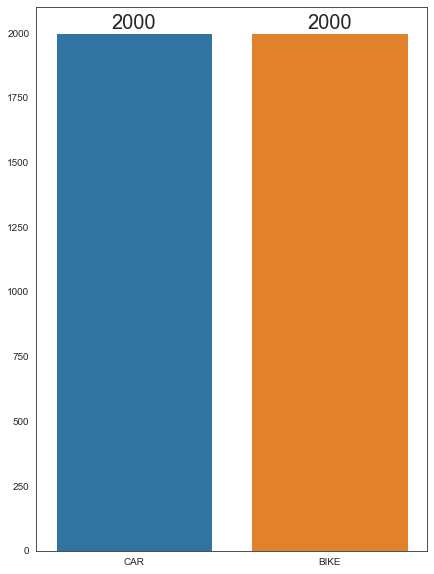

In [13]:
plt.figure(figsize=(7,10))
a = sns.barplot(data=dt_total)
a.bar_label(a.containers[0], fmt='%g', fontsize=20)

## III. Data Loading

Berikut ini adalah kode yang digunakan untuk membaca filepath data gambar mobil dan motor dalam folder train

In [11]:
Bike_train= r'D:\HACKTIV8\Phase_2\Milestone2\dataset-output\train\Bike'
Car_train= r'D:\HACKTIV8\Phase_2\Milestone2\dataset-output\train\Car'
dirlist=[Bike_train, Car_train]
classes=['Bike', 'Car']
filepaths=[]
labels=[]
for d,c in zip(dirlist, classes):
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join (d,f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  3200    labels:  3200


Terdapat 3200 filepath untuk data training

## V. Exploratory Data Analysis (EDA)

Menampilkan sample gambar motor dan mobil dari folder train

Bike    1600
Car     1600
Name: labels, dtype: int64


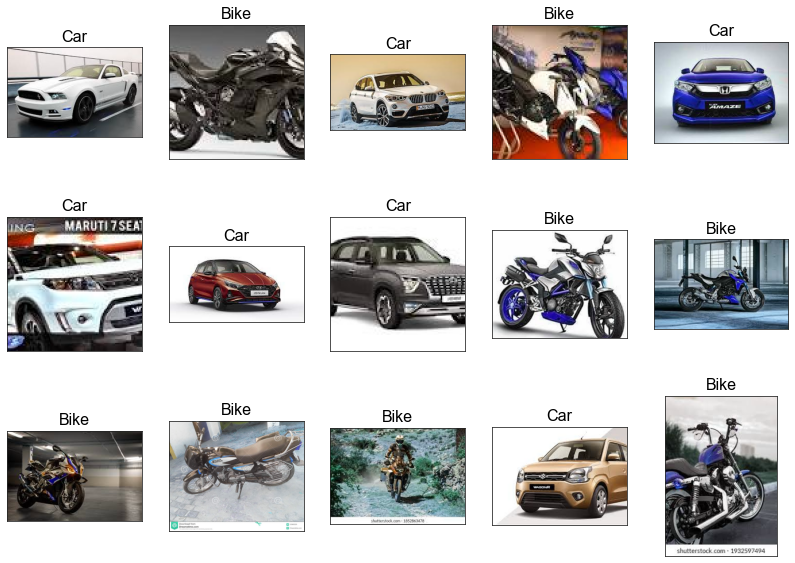

In [13]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)
df=pd.DataFrame(np.array(df).reshape(3200,2), columns = ['file_paths', 'labels'])
print(df['labels'].value_counts())

plt.figure(figsize=(14,10))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"file_paths"]))
    plt.title(df.loc[random, "labels"], size = 16, color = "black") 
    plt.xticks([])
    plt.yticks([])

plt.show()

## VI. Data Preprocessing

Dalam preprocessing akan dilakukan augmentasi dan normalisasi data gambar (Rescaling). Augmentasi dan rescaling akan dilakukan menggunakan `ImageDataGenerator`.

Augmentasi dilakukan dengan cara memutar gambar, menggeser gambar, dan memflip gambar.

In [2]:
dt_total = {'CAR': [1600, 200, 200], 'BIKE': [1600, 200, 200], 'Folder': ['Train', 'Val', 'Test']}
dt_total = pd.DataFrame(data=dt_total)

In [10]:
dt_total

,CAR,BIKE,Folder
0,1600,1600,Train
1,200,200,Val
2,200,200,Test


In [15]:
train_path = r"D:\HACKTIV8\Phase_2\Milestone2\dataset-output\train"
test_path = r"D:\HACKTIV8\Phase_2\Milestone2\dataset-output\test"
val_path = r"D:\HACKTIV8\Phase_2\Milestone2\dataset-output\val"
data_generator = ImageDataGenerator(rescale=1/255., # Normalisaion
                               rotation_range = 90,
                               width_shift_range = 0.1,
                               shear_range=0.2,
                               horizontal_flip = True,
                               vertical_flip = True
                               )
train_set = data_generator.flow_from_directory(train_path, 
                               class_mode = 'categorical', 
                               target_size = (256,256), 
                               shuffle = True, 
                               batch_size = 32
                               )
test_val_gen = ImageDataGenerator(rescale=1/255.)
test_set = test_val_gen.flow_from_directory(test_path,
                               class_mode = 'categorical', 
                               target_size = (256,256), 
                               batch_size = 32
                               )
val_set = test_val_gen.flow_from_directory(val_path,
                               class_mode = 'categorical', 
                               target_size = (256,256), 
                               batch_size = 32
                               )

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


Membuat list nama kelas dari dataset

In [16]:
class_dictionary = train_set.class_indices
#---create a dictionary of labels---
class_dictionary = { value:key for key,value in
    class_dictionary.items()}
#---convert the dictionary to a list---
class_list = [value for _,value in class_dictionary.items()]
print(class_list)

['Bike', 'Car']


Menampilkan data gambar setelah diterapkan augmentasi

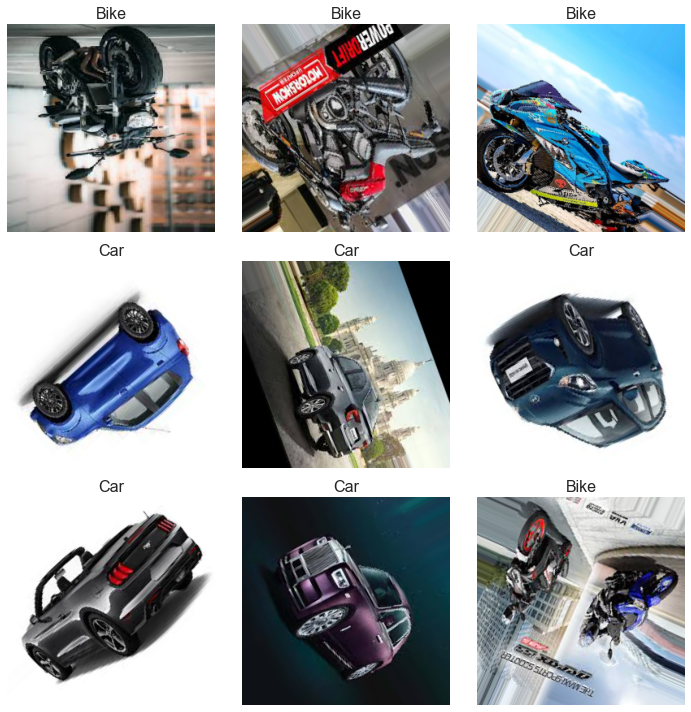

In [21]:
n_images = 9
plt.figure(figsize=(10, 10))
# DictionaryIterator
images, labels = train_set.next()
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_list[np.argmax(labels[i].astype("uint8"))], size=16)
    plt.axis("off")
    i+=1
    if i>=(n_images+1):
        break
plt.tight_layout()
plt.show()

## VII. Deep Learning Model

Dalam bagian ini, saya akan mendefinisikan model yang akan dibuat dengan menggunakan metode Sequential API.

clear session untuk mengosongkan memori 

In [7]:
tf.keras.backend.clear_session()

### VII.I Base Model

#### VII.I.I Model Definition

Base Model dibuat dengan beberapa layer yaitu:
1. Input Layer : menerima masukan gambar dengan shape (256, 256, 3). (, 3) menandakan RGB dan (256, 256) merupakan size gambar
2. Convolution Layer : menerapkan filter pada input gambar
3. Pooling Layer : mengurangi jumlah informasi di setiap fitur yang diperoleh di convolution layer sambil mempertahankan informasi yang paling penting
4. Fully-connected Layer : Mengambil keluaran dari layer sebelumnya dan dilakukan 'Flatten' atau mengubah data menjadi satu vektor dan akan dilakukan perhitungan analisis feature dan weight feature
5. Output Layer : memberikan probabilitas akhir untuk setiap label

In [9]:
model = Sequential([
  tf.keras.layers.InputLayer(input_shape = (256,256,3)), #Input Layer
  tf.keras.layers.Conv2D(64, 3, activation='relu'), #Convlution Layer
  tf.keras.layers.AveragePooling2D(), #Pooling Layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'), #Convlution Layer
  tf.keras.layers.AveragePooling2D(), #Pooling Layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'), #Convlution Layer
  tf.keras.layers.AveragePooling2D(), #Pooling Layer
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(), #fully-conncected layer
  tf.keras.layers.Dense(512, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2'), #fully-conncected layer
  tf.keras.layers.BatchNormalization(), #fully-conncected layer
  tf.keras.layers.Dense(512, activation='relu'), #fully-conncected layer
  tf.keras.layers.BatchNormalization(), #fully-conncected layer
  tf.keras.layers.Dense(512, activation='relu'), #fully-conncected layer
  tf.keras.layers.BatchNormalization(), #fully-conncected layer
  tf.keras.layers.Dense(2, activation = 'softmax' ) #Output layer
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 127, 127, 64)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 127, 127, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 64)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

Model berhasil dibuat dengan total jumlah parameter sebagai berikut:
- Total params: 30,099,842
- Trainable params: 30,096,770
- Non-trainable params: 3,072

Berikut ini adalah gambar flowchart dari model yang dibuat

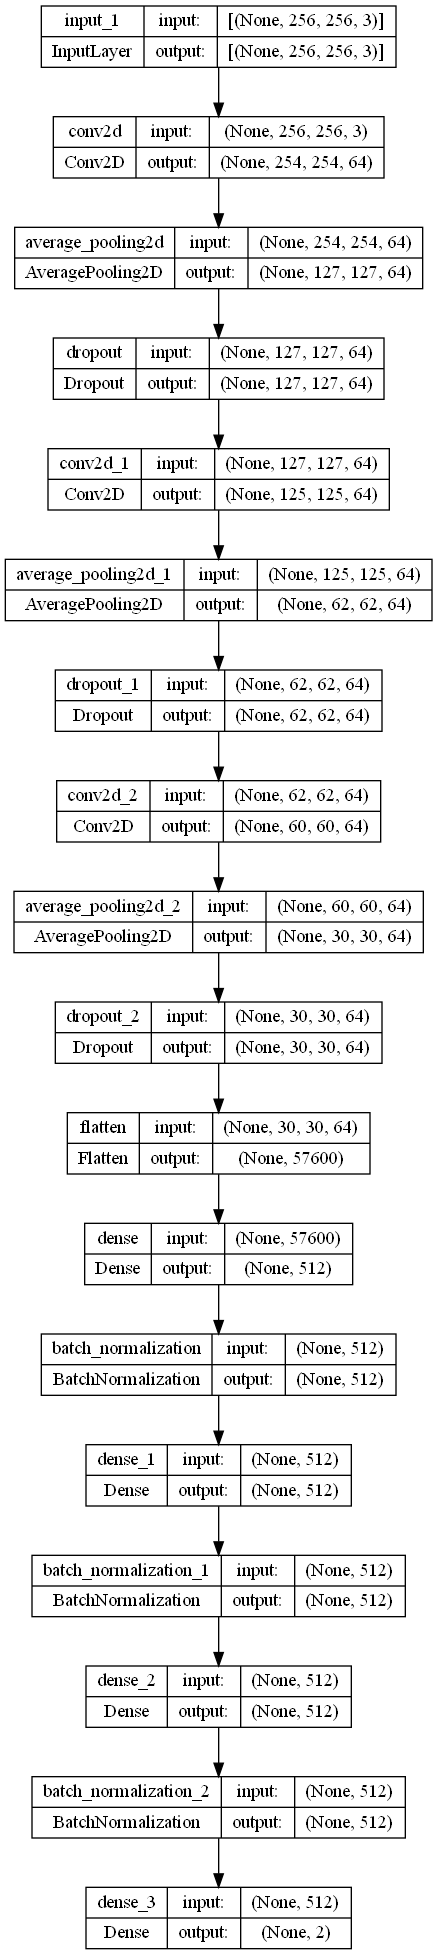

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### VII.I.II Model Compiling

Mendefinisikan loss function, optimizer, dan metrics yang digunakan. 
- Optimizer. Disini saya menggunakan optimizer `adam` karena secara umum `adam` menghasilkan hasil perhitungan bobot (weight) terbaik. 
- Loss Function. loss function yang digunakan adalah `categorical crossentropy` karena model dibuat untuk melakukan masalah klasifikasi dan pada output layer digunakan activation function berupa `softmax`. metrics yang digunakan adalah `accuracy` untuk menghitung tingkat akurasi prediksi model.

In [11]:
model.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=['accuracy'])

#### VII.I.III Training : Base Model

Mendefinisikan `callbacks` yang terdiri dari 
- `checkpoint` untuk mensave model setiap menemukan metrics terbaik, 
- `earlystop` untuk menghentikan training jika selama 5 epoch selanjutnya tidak ada improvisasi, 
- `reduce_lr` untuk mengurangi learning rate ketika model tidak mengalami improvisasi selama 3 epoch berturut-turut.

In [12]:
#Callback checkpoint untuk save model setiap menemukan metrik yang terbaik, disini diset validation loss
checkpoint = ModelCheckpoint('BIke_Car_Detection_Model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

#Callback untuk menghentikan training jika val_lossnya paling rendah dengan menunggu 5 epoch selanjutnya baru berhenti jika tidak ada improvisasi
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

#Mengurangi nilai learning rate ketika model tidak mengalami improvisasi selama 3 epoch berturut-turut
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

Melakukan training pada data training dan dilakukan validasi terhadap data validasi

In [13]:
history_model = model.fit(
  train_set,
  validation_data=val_set,
  epochs=40,
  callbacks=[checkpoint, earlystop, reduce_lr],
  shuffle = True,
  batch_size = 32
)

Epoch 1/40
  9/100 [=>............................] - ETA: 3:32 - loss: 11.0337 - accuracy: 0.5764

c:\Users\nawwa\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - ETA: 0s - loss: 6.7082 - accuracy: 0.6300
Epoch 1: val_loss improved from inf to 3.02534, saving model to BIke_Car_Detection_Model.h5
100/100 [==============================] - 237s 2s/step - loss: 6.7082 - accuracy: 0.6300 - val_loss: 3.0253 - val_accuracy: 0.5375 - lr: 0.0010
Epoch 2/40
100/100 [==============================] - ETA: 0s - loss: 1.8315 - accuracy: 0.6966
Epoch 2: val_loss improved from 3.02534 to 1.30526, saving model to BIke_Car_Detection_Model.h5
100/100 [==============================] - 233s 2s/step - loss: 1.8315 - accuracy: 0.6966 - val_loss: 1.3053 - val_accuracy: 0.7050 - lr: 0.0010
Epoch 3/40
100/100 [==============================] - ETA: 0s - loss: 1.1288 - accuracy: 0.7044
Epoch 3: val_loss improved from 1.30526 to 0.99036, saving model to BIke_Car_Detection_Model.h5
100/100 [==============================] - 238s 2s/step - loss: 1.1288 - accuracy: 0.7044 - val_loss: 0.9904 - val_accuracy: 0.7075 - lr: 0.0010
Epoc

Terlihat bahwa terjadi penurunan learning rate ketika model tidak improve selama 3 epoch berturut-turut. Training berhenti pada epoch ke 19 dan mengembalikan weight model ke epoch 14 dimana merupakan best epoch sebelum training berhenti. Hal ini terjadi karena menerapkan `callbacks` pada training model.

Menampilkan grafik perubahan nilai loss selama training model

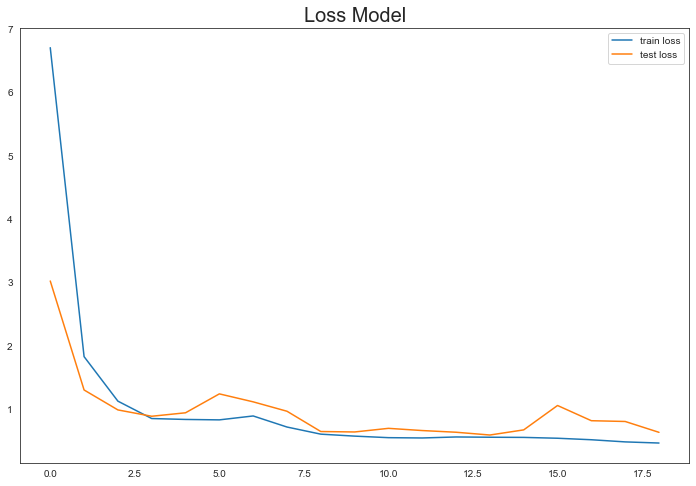

In [14]:
plt.figure(figsize=(12,8))
plt.title('Loss Model', fontsize=20)
plt.plot(history_model.history['loss'],label='train loss')
plt.plot(history_model.history['val_loss'],label='test loss')
plt.xticks(np.arange(1, 20, step=1))
plt.legend()

Dari gambar diatas, terlihat bahwa terjadi kenaikan nilai loss pada epoch ke 15 hingga epoch ke 19 sehingga weight model kembali pada best epoch yaitu pada epoch ke 14.

Menampilkan grafik perubahan akurasi selama training model

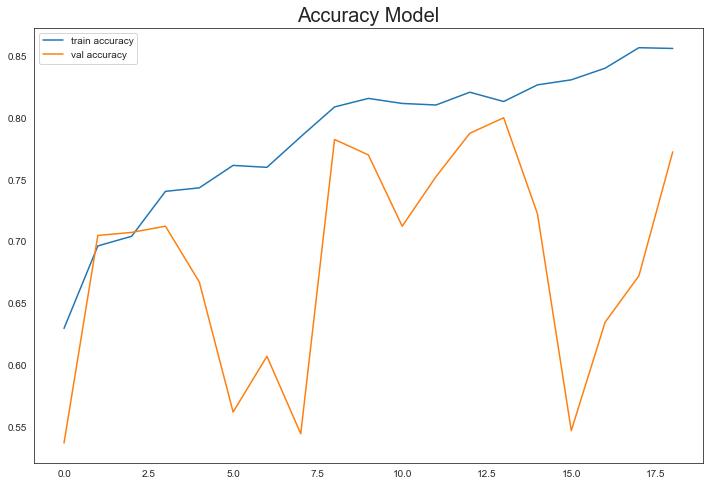

In [15]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Model', fontsize=20)
plt.plot(history_model.history['accuracy'],label='train accuracy')
plt.plot(history_model.history['val_accuracy'],label='val accuracy')
plt.xticks(np.arange(1, 20, step=1))
plt.legend()

Dari gambar diatas, terlihat bahwa terjadi gradient exploding pada data validasi. Base model CNN yang telah dibuat memiliki hasil sebagai berikut (pada epoch 14)
1. Training
    - loss: 0.5592 
    - accuracy: 0.8131
2. Validasi
    - val_loss: 0.5942 
    - val_accuracy: 0.8000

### VII.II Model Improvement

Model improvement akan dilakukan dengan menggunakan metode transfer learning menggunakan `ResNet50V2`.

mengosongkan memori

In [17]:
tf.keras.backend.clear_session()

#### VII.II.I Model Definition : ResNet50V2

definisi model ResNet50V2

In [18]:
base_model = tf.keras.applications.ResNet50V2(input_shape=(256, 256,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
base_model.trainable = False

Digunakan arsitektur model `ResNet50V2` untuk improvisasi model. Model ResNet-50 adalah pre-trained Deep Learning Model untuk kasus Klasifikasi Gambar berdasarkan Convolutional Neural Network(CNN). ResNet-50 sudah dilatih dengan jutaan gambar dari 1000 kategori dari database ImageNet. Terdapat banyak pre-trained model yang lain, namun secara umum, kinerja ResNet-50 sangat baik dan memiliki tingkat kesalahan yang lebih sedikit dalam kasus Recognition atau Klasifikasi.

- include_top=False, berarti tidak menggunakan fully-connected layer dari model ResNet50V2
- weight = "imagenet", menggunakan data weight yang dilatih menggunakan database imagenet
- base_model.trainable = False, artinya kita tidak melakukan training menggunakan ResNet50V2, hanya menggunakan data weightnya saja

In [19]:
model_improve = Sequential([
  base_model,
  tf.keras.layers.Flatten(), #Fully-connected layer
  tf.keras.layers.Dense(512, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2'), #Fully-connected layer
  tf.keras.layers.Dropout(0.2), #Fully-connected layer
  tf.keras.layers.Dense(2, activation='softmax') #Output Layer
])


model_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 90,675,202
Trainable params: 67,110,402
Non-trainable params: 23,564,800
_________________________________________________________________


Dari data diatas, parameter yang digunakan adalah
- Total params: 90,675,202
- Trainable params: 67,110,402
- Non-trainable params: 23,564,800

Menampilkan flowchart dari model improvement

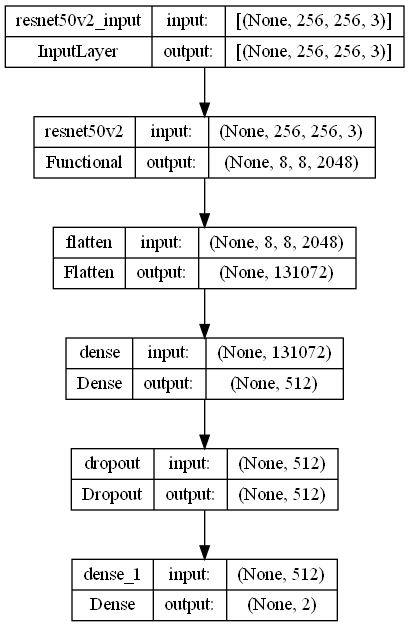

In [20]:
tf.keras.utils.plot_model(model_improve, show_shapes=True, show_layer_names=True)

#### VII.II.II Model Compiling

mendefinisikan optimizer, loss function, dan metrics yang digunakan

In [21]:
model_improve.compile(
  optimizer='adam',
  loss="categorical_crossentropy",
  metrics=['accuracy'])

#### VII.II.III Training : Pre-Trained Model

Mendefinisikan callbacks yang akan digunakan saat training

In [22]:
#Callback checkpoint untuk save model setiap menemukan metrik yang terbaik, disini diset validation loss
checkpoint_2 = ModelCheckpoint('BIke_Car_Detection_Model_Improved.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

#Callback untuk menghentikan training jika val_lossnya paling rendah dengan menunggu 5 epoch selanjutnya baru berhenti jika tidak ada improvisasi
earlystop_2 = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

#Mengurangi nilai learning rate ketika model tidak mengalami improvisasi selama 3 epoch berturut-turut
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [23]:
history_model_improve = model_improve.fit(
  train_set,
  validation_data=val_set,
  epochs=40,
  callbacks=[checkpoint_2, earlystop_2, reduce_lr_2],
  shuffle = True,
  batch_size = 32
)

Epoch 1/40
100/100 [==============================] - ETA: 0s - loss: 11.0957 - accuracy: 0.9378
Epoch 1: val_loss improved from inf to 6.00271, saving model to BIke_Car_Detection_Model_Improved.h5
100/100 [==============================] - 276s 3s/step - loss: 11.0957 - accuracy: 0.9378 - val_loss: 6.0027 - val_accuracy: 0.9925 - lr: 0.0010
Epoch 2/40
100/100 [==============================] - ETA: 0s - loss: 5.0532 - accuracy: 0.9712
Epoch 2: val_loss improved from 6.00271 to 3.04223, saving model to BIke_Car_Detection_Model_Improved.h5
100/100 [==============================] - 268s 3s/step - loss: 5.0532 - accuracy: 0.9712 - val_loss: 3.0422 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 3/40
100/100 [==============================] - ETA: 0s - loss: 2.7856 - accuracy: 0.9650
Epoch 3: val_loss improved from 3.04223 to 2.23143, saving model to BIke_Car_Detection_Model_Improved.h5
100/100 [==============================] - 272s 3s/step - loss: 2.7856 - accuracy: 0.9650 - val_loss: 2.2314 

Model transfer learning menjalankan seluruh epoch (40 epoch). Model ini memberikan hasil sebagai berikut
1. Training
    - loss: 0.0982
    - accuracy: 0.9928
2. Validasi
    - val_loss: 0.0839
    - val_accuracy: 0.9950


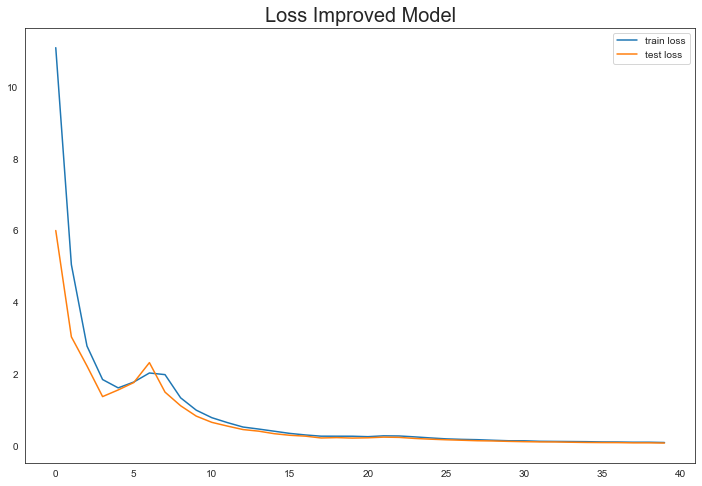

In [24]:
plt.figure(figsize=(12,8))
plt.title('Loss Improved Model', fontsize=20)
plt.plot(history_model_improve.history['loss'],label='train loss')
plt.plot(history_model_improve.history['val_loss'],label='test loss')
plt.legend()

Bila melihat gambar diatas, terlihat adanya lonjakan nilai loss pada sekitaran epoch 4 hingga 7

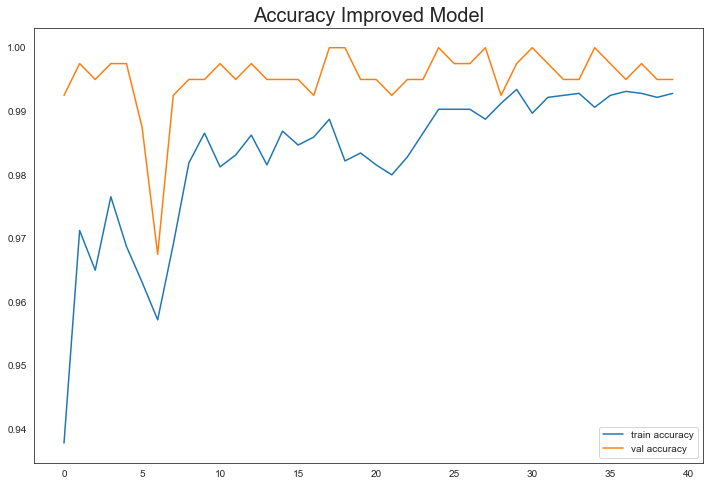

In [25]:
plt.figure(figsize=(12,8))
plt.title('Accuracy Improved Model', fontsize=20)
plt.plot(history_model_improve.history['accuracy'],label='train accuracy')
plt.plot(history_model_improve.history['val_accuracy'],label='val accuracy')
plt.legend()

Dari gambar diatas, terlihat hasil akurasi seperti terdapat exploding gradient, namun bila melihat ukuran rentang perubahannya, ini **tidak mengalami exploding gradient**.

## VIII. Evaluasi Model

In [10]:
# Evaluating result of the final model
result_eval= load_model.evaluate(train_set)
print('Train - Loss     : ', result_eval[0])
print('Train - Accuracy : ', result_eval[1])
print('')

result_eval= load_model.evaluate(val_set)
print('val - Loss     : ', result_eval[0])
print('val - Accuracy : ', result_eval[1])
print('')

result_eval= load_model.evaluate(test_set)
print('Test - Loss     : ', result_eval[0])
print('Test - Accuracy : ', result_eval[1])
print('')

 12/100 [==>...........................] - ETA: 2:47 - loss: 0.0944 - accuracy: 0.9922

c:\Users\nawwa\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 [==============================] - 192s 2s/step - loss: 0.0947 - accuracy: 0.9953
Train - Loss     :  0.09465306252241135
Train - Accuracy :  0.995312511920929

13/13 [==============================] - 22s 2s/step - loss: 0.0839 - accuracy: 0.9950
val - Loss     :  0.0838635191321373
val - Accuracy :  0.9950000047683716

13/13 [==============================] - 22s 2s/step - loss: 0.1146 - accuracy: 0.9875
Test - Loss     :  0.11456182599067688
Test - Accuracy :  0.987500011920929



1/1 [==============================] - 3s 3s/step


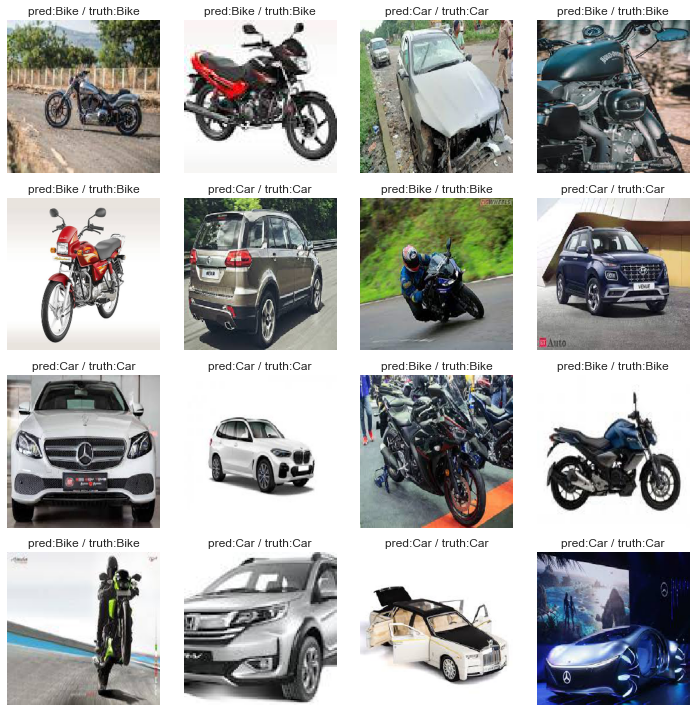

In [33]:
n_images = 16
plt.figure(figsize=(10, 10))
images, labels = test_set.next()
preds = load_model.predict(images)
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    #plt.title(class_list[np.argmax(labels[i].astype("uint8"))])
    plt.title('pred:%s / truth:%s' % (class_list[np.argmax(preds[i])], class_list[np.argmax(labels[i].astype("uint8"))]))
    plt.axis("off")
    i+=1
    if i>=(n_images+1):
        break
plt.tight_layout()
plt.show()

## IX. Inference

### IX.I Load Model

In [8]:
# Load model
load_model = tf.keras.models.load_model('BIke_Car_Detection_Model_Improved.h5')

### IX.II Load Image

In [50]:
test_image_1 = r"D:\HACKTIV8\Phase_2\Milestone2\bike_inference.jpeg"
img1 = keras.preprocessing.image.load_img(
    test_image_1, target_size=(256, 256)
)

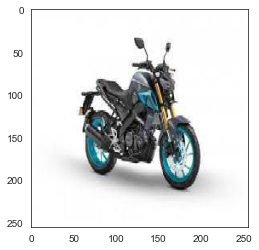

In [51]:
plt.imshow(img1)

### IX.III Predict Image

In [52]:
img_array = keras.preprocessing.image.img_to_array(img1)
img_array = tf.expand_dims(img_array, 0)

predictions = load_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_list[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 320ms/step
This image most likely belongs to Bike with a 73.11 percent confidence.


## X. Kesimpulan

Kesimpulan dari project ini adalah
- Telah dilakukan pemodelan Deep Learning untuk Image Classification dengan menggunakan metode Convolutional Neural Network (CNN)
- Preprocessing yang dilakukan adalah
    1. Data Augmentasi : Rotasi gambar, Flip gambar, Menggeser gambar
    2. Normalisasi/Rescaling
- Pemodelan dibuat menggunakan metode CNN yang dibuat sendiri dan metode transfer learning menggunakan ResNet50V2
- Model CNN yang dibuat sendiri memiliki nilai akurasi sebesar 80% dan nilai loss sebesar 0.59 saat model training. Sedangkan model transfer learning menggunakan ResNet50V2 menghasilkan nilai akurasi sebesar 0.9950 dan nilai loss sebesar 0.08 saat model training. Sehingga dipilih model transfer learning
